### Keras cnn

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Dropout

Using TensorFlow backend.


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("mnist", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
X_train = mnist.train.images.reshape(-1,28,28,1)
y_train = mnist.train.labels
X_test = mnist.test.images.reshape(-1,28,28,1)
y_test = mnist.test.labels


In [4]:
# Step 2 Model

L1= 16
L2 = 32
L3 = 64 
model = Sequential()
model.add(Conv2D(L1,(3,3),activation='relu',
                input_shape=(28,28,1),padding='same'))

model.add(MaxPooling2D((2,2)))
model.add(Conv2D(L2,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(L3,activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(10,activation='softmax'))


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                100416    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
__________

In [6]:
# Step 3 Compile the Model

model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])

In [7]:
# Step 4 Train

history = model.fit(X_train,y_train,epochs=10, batch_size=100, validation_data=(X_test,y_test))

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 22s 404us/step - loss: 0.4117 - acc: 0.8728 - val_loss: 0.0833 - val_acc: 0.9729
Epoch 2/10
55000/55000 [==============================] - 21s 388us/step - loss: 0.1552 - acc: 0.9548 - val_loss: 0.0576 - val_acc: 0.9810
Epoch 3/10
55000/55000 [==============================] - 24s 435us/step - loss: 0.1177 - acc: 0.9649 - val_loss: 0.0480 - val_acc: 0.9844
Epoch 4/10
55000/55000 [==============================] - 22s 398us/step - loss: 0.0974 - acc: 0.9715 - val_loss: 0.0388 - val_acc: 0.9876
Epoch 5/10
55000/55000 [==============================] - 20s 355us/step - loss: 0.0838 - acc: 0.9746 - val_loss: 0.0381 - val_acc: 0.9870
Epoch 6/10
41700/55000 [=====================>........] - ETA: 6s - loss: 0.0772 - acc: 0.9767

KeyboardInterrupt: 

In [ ]:
# Step 5 Evaluation

loss, acc = model.evaluate(X_test,y_test)

In [ ]:
acc

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
losss = history.history['loss']
val_loss = history.history['val_loss']

In [0]:
epochs = range(1,len(acc)+1)

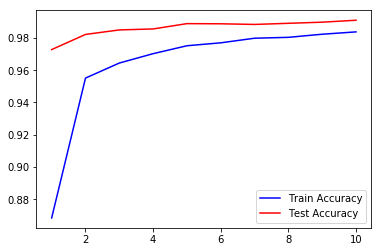

In [17]:
plt.plot(epochs, acc,'b',label='Train Accuracy')
plt.plot(epochs, val_acc,'r',label='Test Accuracy')
plt.legend()
plt.show()

### Ex: CNN on CIFAR10

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten, Conv2D, MaxPooling2D

# Parameters
n_classes = 10
learning_rate = 1
training_epochs = 1

In [20]:
# Step 1 Preprocess data
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

170500096/170498071 [==============================] - 13s 0us/step


In [0]:
# Step 2: Create the Model

L1=32
L2 =64
L3 =128 

model = Sequential()
model.add(Conv2D(L1,(3,3),activation='relu',
                input_shape=(32,32,3),padding='same'))

model.add(MaxPooling2D((2,2)))
model.add(Conv2D(L2,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(L3,activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(10,activation='softmax'))


In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               524416    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [0]:
# Step 3: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])



In [26]:
# Step 4: Train the Model
model.fit(X_train, y_train, epochs=training_epochs, validation_data=[X_test,y_test])

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 9s 170us/step - loss: 1.6093 - acc: 0.4098 - val_loss: 1.2486 - val_acc: 0.5583


In [27]:
# Step 5: Evaluate the Model
loss,acc = model.evaluate(X_test, y_test)
print('Test accuracy:', acc)

10000/10000 [==============================] - 1s 69us/step
Test accuracy: 0.5583


In [0]:
# Step 6: Save the Model
model.save("./cifar_cnn.h5")